# HW12
## Problem 1 (Ridge Regression for Predicting Concrete Strength)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [4]:
# load data
df_train = pd.read_csv('./Concrete_train.csv')
df_test  = pd.read_csv('./Concrete_test.csv')

df_train.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,233.81,0.0,94.58,197.89,4.567,947.04,852.16,28,22.835445
1,251.81,0.0,99.94,146.14,12.350,1006.00,899.76,56,44.140254
2,252.00,0.0,0.00,186.00,0.000,1111.00,784.00,7,11.465986


In [5]:
# define features and target
features_train = df_train.drop(df_train.columns[-1],axis=1)
features_test  = df_test.drop(df_test.columns[-1],axis=1)
target_train = df_train.iloc[:,-1]
target_test  = df_test.iloc[:,-1]

### (A)

C:\Users\rileyma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



        optimal alpha = 1000
  optimal training R2 = 0.636
optimal validation R2 = 0.627
      optimal test R2 = 0.566


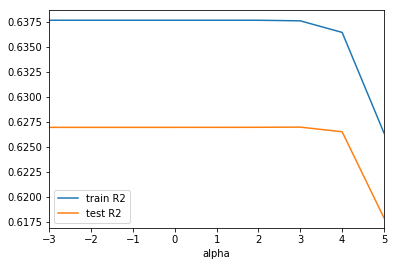

In [6]:
grid = {'alpha':[0.001,0.01,0.1,1,10,100,1000,10000,100000]}

ridge = Ridge()
ridgeCV = GridSearchCV(ridge,param_grid=grid,return_train_score=True)
ridgeCV.fit(features_train,target_train)

performance = pd.DataFrame()
performance['alpha'] = np.log10(grid['alpha'])
performance['train R2'] = ridgeCV.cv_results_['mean_train_score']
performance['test R2']  = ridgeCV.cv_results_['mean_test_score']
ax1 = performance.plot.line(x='alpha',y='train R2')
performance.plot.line(x='alpha',y='test R2',ax=ax1)

R2_train = ridgeCV.best_estimator_.score(features_train,target_train)
R2_valid = ridgeCV.best_score_
R2_test  = ridgeCV.best_estimator_.score(features_test,target_test)

print()
print('        optimal alpha =',ridgeCV.best_params_['alpha'])
print('  optimal training R2 =',R2_train.round(3))
print('optimal validation R2 =',R2_valid.round(3))
print('      optimal test R2 =',R2_test.round(3))

### (B)

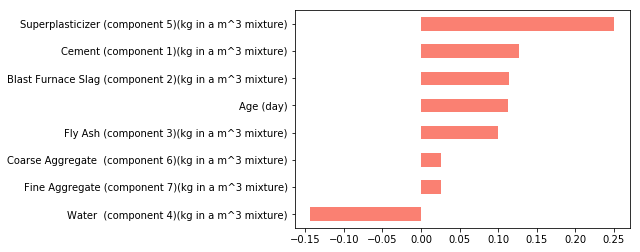

In [7]:
coef = ridgeCV.best_estimator_.coef_
coef = pd.Series(coef,index=features_train.columns)
coef.sort_values().plot.barh(color='salmon')

### (C)

C:\Users\rileyma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



        optimal alpha = 1
  optimal training R2 = 0.636
optimal validation R2 = 0.627
      optimal test R2 = 0.567


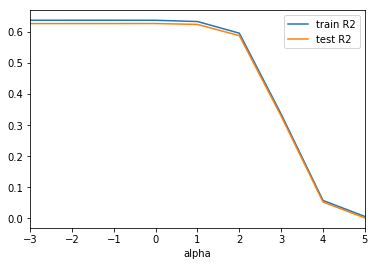

In [8]:
# standardize features
features_train = (features_train - features_train.mean())/features_train.std()
features_test  = (features_test - features_test.mean())/features_test.std()


grid = {'alpha':[0.001,0.01,0.1,1,10,100,1000,10000,100000]}

ridge = Ridge()
ridgeCV = GridSearchCV(ridge,param_grid=grid,return_train_score=True)
ridgeCV.fit(features_train,target_train)

performance = pd.DataFrame()
performance['alpha'] = np.log10(grid['alpha'])
performance['train R2'] = ridgeCV.cv_results_['mean_train_score']
performance['test R2']  = ridgeCV.cv_results_['mean_test_score']
ax1 = performance.plot.line(x='alpha',y='train R2')
performance.plot.line(x='alpha',y='test R2',ax=ax1)

R2_train = ridgeCV.best_estimator_.score(features_train,target_train)
R2_valid = ridgeCV.best_score_
R2_test  = ridgeCV.best_estimator_.score(features_test,target_test)

print()
print('        optimal alpha =',ridgeCV.best_params_['alpha'])
print('  optimal training R2 =',R2_train.round(3))
print('optimal validation R2 =',R2_valid.round(3))
print('      optimal test R2 =',R2_test.round(3))

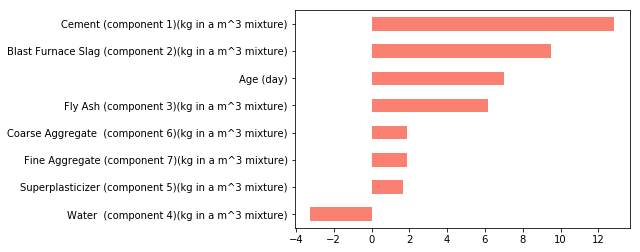

In [9]:
coef = ridgeCV.best_estimator_.coef_
coef = pd.Series(coef,index=features_train.columns)
coef.sort_values().plot.barh(color='salmon')

#### Only the coefficients are affected by standardization. Standardization puts the features on an equal footing making them unitless. Cement rather than Superplasticizer is the most important component determining the compressive strength of concrete. However, it should be stressed that the unit labels on the standardized features coefficient bar plot are not relevant (they should be unitless) where as the units would be relevant for the unstandardized features, coefficient bar plot.¶


## Problem 2 (Random Forests for Predicting Concrete Strength)

### (A)

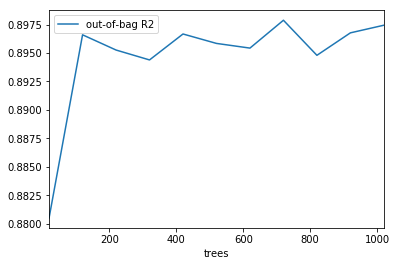

In [10]:
n_trees = np.arange(20,1100,100)
oob_score = []
for n in n_trees:
    rf = RandomForestRegressor(n_estimators=n,oob_score=True)
    rf.fit(features_train,target_train)
    oob_score.append(rf.oob_score_)

performance = pd.DataFrame()
performance['trees'] = n_trees
performance['out-of-bag R2'] = oob_score
performance.plot.line(x='trees',y='out-of-bag R2')

#### The plot above indicates out-of-bag R2 (an estimate for validation R2) stabilizes at around 400 trees. (Note that using more than 400 trees will not cause overfitting nor improve accuracy and will just be wasted computational effort.)

In [11]:
rf = RandomForestRegressor(n_estimators=400,oob_score=True)
rf.fit(features_train,target_train)
R2_train = rf.score(features_train,target_train)
R2_oob   = rf.oob_score_
R2_test  = rf.score(features_test,target_test)

print()
print('number of trees =',400)
print('    training R2 =',R2_train.round(3))
print('  out-of-bag R2 =',R2_oob.round(3))
print('        test R2 =',R2_test.round(3))


number of trees = 400
    training R2 = 0.983
  out-of-bag R2 = 0.897
        test R2 = 0.823


### (B)

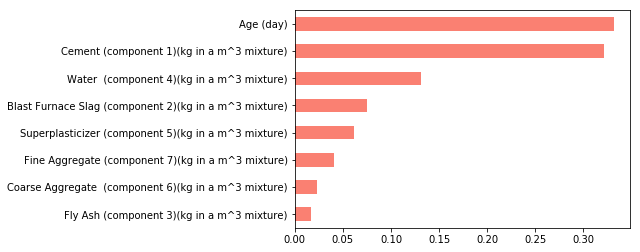

In [12]:
feature_importance = rf.feature_importances_
feature_importance = pd.Series(feature_importance,index=features_train.columns)
feature_importance.sort_values().plot.barh(color='salmon')

#### Random forest feature importance index is non-negative and gives a different result from ridge regression. Since, both training and test R2 are much better for random forest regression than ridge regression, the above bar chart is more credible.

### (C)

In [13]:
# standardize features
features_train = (features_train - features_train.mean())/features_train.std()
features_test  = (features_test - features_test.mean())/features_test.std()

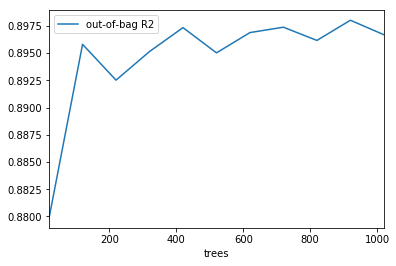

In [14]:
n_trees = np.arange(20,1100,100)
oob_score = []
for n in n_trees:
    rf = RandomForestRegressor(n_estimators=n,oob_score=True)
    rf.fit(features_train,target_train)
    oob_score.append(rf.oob_score_)

performance = pd.DataFrame()
performance['trees'] = n_trees
performance['out-of-bag R2'] = oob_score
performance.plot.line(x='trees',y='out-of-bag R2')

In [15]:
rf = RandomForestRegressor(n_estimators=400,oob_score=True)
rf.fit(features_train,target_train)
R2_train = rf.score(features_train,target_train)
R2_oob   = rf.oob_score_
R2_test  = rf.score(features_test,target_test)

print()
print('number of trees =',400)
print('    training R2 =',R2_train.round(3))
print('  out-of-bag R2 =',R2_oob.round(3))
print('        test R2 =',R2_test.round(3))


number of trees = 400
    training R2 = 0.983
  out-of-bag R2 = 0.896
        test R2 = 0.824


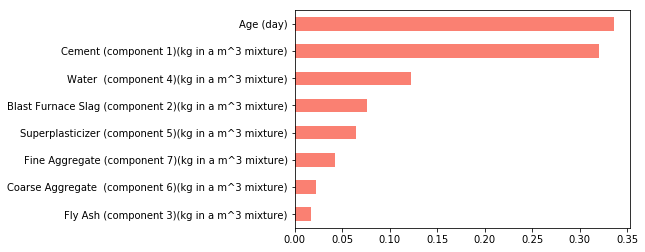

In [16]:
feature_importance = rf.feature_importances_
feature_importance = pd.Series(feature_importance,index=features_train.columns)
feature_importance.sort_values().plot.barh(color='salmon')

#### The results for random forests regression are virtually unchange if the features are standardized or not.